### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

The Datasets
Randomly selected data for the first six months of 2017 are provided for all three cities. All three of the data files contain the same core six (6) columns:

* Start Time (e.g., 2017-01-01 00:07:57) <br>
* End Time (e.g., 2017-01-01 00:20:53) <br>
* Trip Duration (in seconds - e.g., 776) <br>
* Start Station (e.g., Broadway & Barry Ave) <br>
* End Station (e.g., Sedgwick St & North Ave) <br>
* User Type (Subscriber or Customer) <br>
* The Chicago and New York City files also have the following two columns: <br>

* Gender
* Birth Year

In [1]:

#Turn warnings off
options(warn = -1)
#Import
library(readr)
library(ggplot2) 


In [2]:
#Importing all the datasets 
ny <- read_csv("new_york_city.csv")
wash <- read_csv("washington.csv")
chi <- read_csv("chicago.csv")

New names:
• `` -> `...1`
Rows: 300000 Columns: 9
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): Start Station, End Station, User Type, Gender
dbl  (3): ...1, Trip Duration, Birth Year
dttm (2): Start Time, End Time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 300000 Columns: 7
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): Start Station, End Station, User Type
dbl  (2): ...1, Trip Duration
dttm (2): Start Time, End Time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 300000 Columns: 9
── Column specification ──────

In [3]:
#Checking the first 6 rows of ny dataset
head(ny)

...1,Start Time,End Time,Trip Duration,Start Station,End Station,User Type,Gender,Birth Year
<dbl>,<dttm>,<dttm>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [4]:
#Checking the first 6 rows of wash dataset
head(wash)

...1,Start Time,End Time,Trip Duration,Start Station,End Station,User Type
<dbl>,<dttm>,<dttm>,<dbl>,<chr>,<chr>,<chr>
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [5]:
#Checking the first 6 rows of chi dataset
head(chi)

...1,Start Time,End Time,Trip Duration,Start Station,End Station,User Type,Gender,Birth Year
<dbl>,<dttm>,<dttm>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


In [6]:
#Checking the last 6 rows of chi dataset
tail(chi)

...1,Start Time,End Time,Trip Duration,Start Station,End Station,User Type,Gender,Birth Year
<dbl>,<dttm>,<dttm>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
935129,2017-05-23 17:08:04,2017-05-23 17:11:37,213,Indiana Ave & 31st St,MLK Jr Dr & 29th St,Subscriber,Male,1988
64825,2017-01-21 13:18:00,2017-01-21 13:27:50,590,Orleans St & Elm St (*),Sheffield Ave & Webster Ave,Subscriber,Male,1965
695993,2017-04-28 19:32:19,2017-04-28 19:51:18,1139,Ashland Ave & Blackhawk St,Clark St & Elm St,Customer,NA,NA
159685,2017-02-12 09:59:01,2017-02-12 10:21:49,1368,Ravenswood Ave & Lawrence Ave,Stockton Dr & Wrightwood Ave,Subscriber,Female,1988
564681,2017-04-16 17:07:15,2017-04-16 17:19:00,705,Sheffield Ave & Willow St,Clark St & Chicago Ave,Customer,NA,NA
1021247,2017-05-30 12:38:28,2017-05-30 12:55:36,1028,Wacker Dr & Washington St,Damen Ave & Division St,Subscriber,Male,1984


In [7]:
#Checking the last 6 rows of wash dataset
tail(wash)

...1,Start Time,End Time,Trip Duration,Start Station,End Station,User Type
<dbl>,<dttm>,<dttm>,<dbl>,<chr>,<chr>,<chr>
101489,2017-01-20 14:03:00,2017-01-20 15:11:00,4086.828,Henry Bacon Dr & Lincoln Memorial Circle NW,24th & N St NW,Customer
945535,2017-04-26 03:12:14,2017-04-26 03:41:19,1745.528,Lincoln Memorial,Jefferson Dr & 14th St SW,Customer
1495781,2017-06-11 09:48:52,2017-06-11 10:22:31,2018.450,Key Blvd & N Quinn St,5th & K St NW,Subscriber
12860,2017-01-04 14:33:00,2017-01-04 14:43:00,583.897,17th & K St NW / Farragut Square,7th & F St NW/Portrait Gallery,Subscriber
977621,2017-04-28 07:17:47,2017-04-28 07:56:31,2324.170,Jefferson Dr & 14th St SW,Washington & Independence Ave SW/HHS,Customer
1553359,2017-06-16 04:08:16,2017-06-16 04:29:38,1281.459,10th & Monroe St NE,3rd & H St NW,Customer


In [8]:
#Checking the last 6 rows of ny dataset
tail(ny)

...1,Start Time,End Time,Trip Duration,Start Station,End Station,User Type,Gender,Birth Year
<dbl>,<dttm>,<dttm>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
4198848,2017-05-14 12:43:21,2017-05-14 12:57:51,869,Cumberland St & Lafayette Ave,Plaza St West & Flatbush Ave,Subscriber,Female,1991
3273600,2017-04-24 17:51:12,2017-04-24 17:59:28,495,W 25 St & 6 Ave,W 38 St & 8 Ave,Subscriber,Male,1977
3418509,2017-04-28 12:02:29,2017-04-28 12:19:04,994,W 27 St & 7 Ave,W 52 St & 5 Ave,Subscriber,Male,1967
5034995,2017-05-31 09:11:10,2017-05-31 09:24:16,785,3 Ave & E 72 St,W 44 St & 5 Ave,Subscriber,Male,1972
78227,2017-01-05 08:31:37,2017-01-05 08:51:01,1164,Columbia St & Kane St,Barclay St & Church St,Subscriber,Male,1964
2554332,2017-04-09 17:46:51,2017-04-09 18:06:40,1189,Division St & Bowery,Lafayette St & Jersey St,Subscriber,Female,1985


In [9]:
#Checking the number of Columns of ny Dataset
ncol(ny)
#Checking the Columns Names of ny Dataset
colnames(ny)

[1] 9

[1] "...1"          "Start Time"    "End Time"      "Trip Duration"
[5] "Start Station" "End Station"   "User Type"     "Gender"       
[9] "Birth Year"

In [10]:
#Checking the number of Columns of chi Dataset
ncol(chi)
#Checking the Columns Names of chi Dataset
colnames(chi)

[1] 9

[1] "...1"          "Start Time"    "End Time"      "Trip Duration"
[5] "Start Station" "End Station"   "User Type"     "Gender"       
[9] "Birth Year"

In [11]:
#Checking the number of Columns of wash Dataset
ncol(wash)
#Checking the Columns Names of wash Dataset
colnames(wash)

[1] 7

[1] "...1"          "Start Time"    "End Time"      "Trip Duration"
[5] "Start Station" "End Station"   "User Type"

**We can see that Wash dataset doesn't have the Gender and Birth Year Column**

### Q1-1 Popular times of travel (i.e., occurs most often in the start time) <br>
**What is the most common month for NewYork?.** <br>
**What is the most common day of week for NewYork?.** <br>
**What is the most common hour of day for NewYork?.**




Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union




Most common month in New York:
# A tibble: 1 × 2
  month     n
  <ord> <int>
1 Jun   76022

Most common day of the week in New York:
# A tibble: 1 × 2
  day_of_week     n
  <ord>       <int>
1 Wed         52087


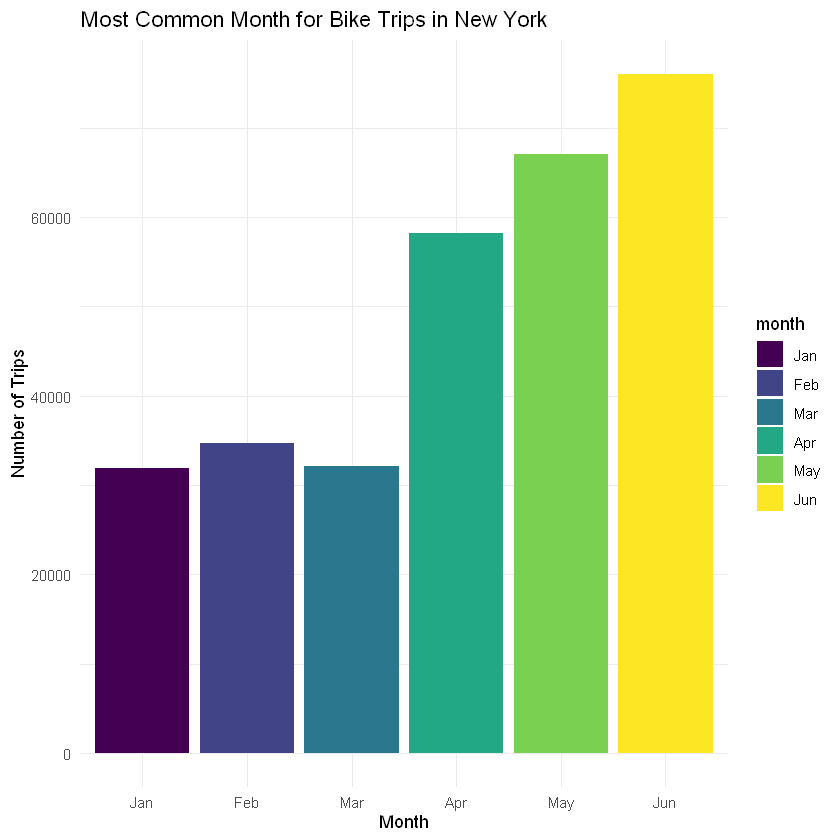


Most common hour of the day in New York:
# A tibble: 1 × 2
   hour     n
  <int> <int>
1    17 30041


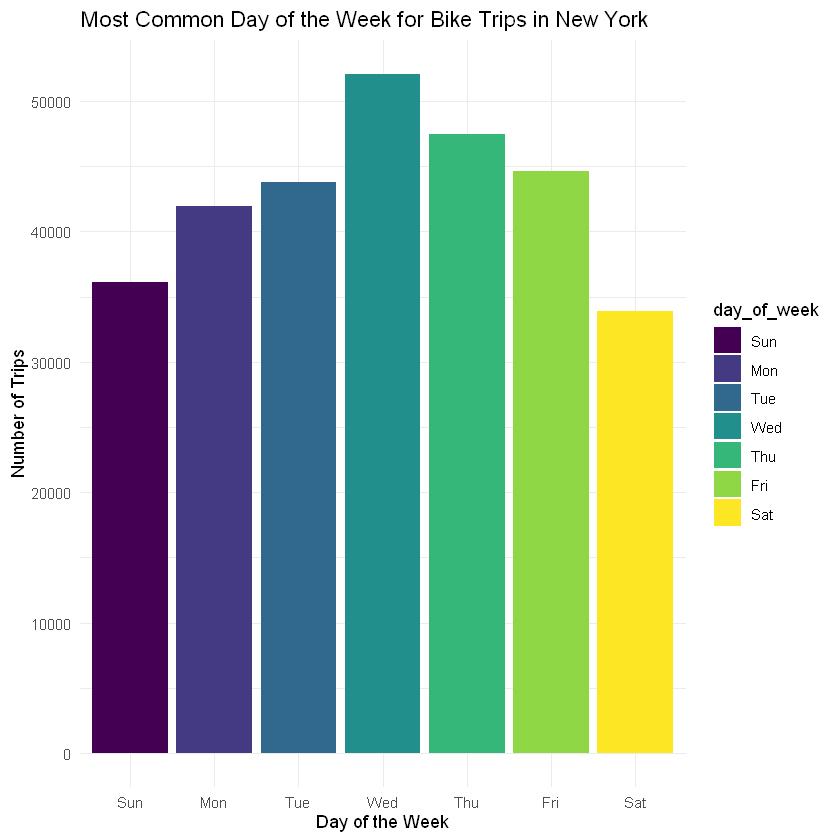

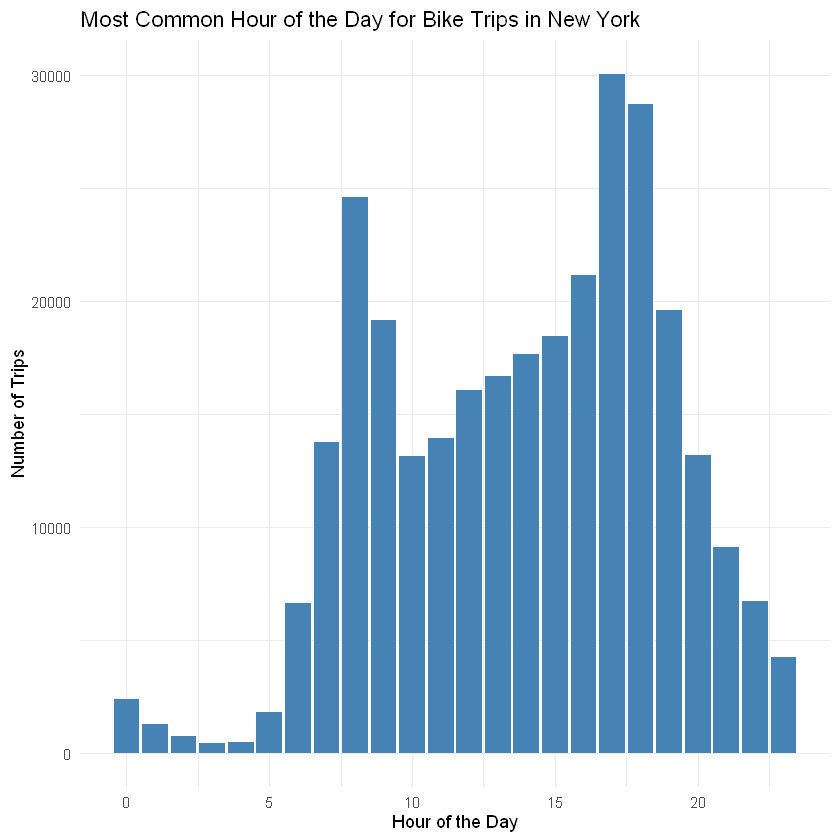

In [12]:
# Load necessary libraries
library(dplyr)
library(lubridate)
library(ggplot2)

# Ensure the column name is referenced correctly and extract time components
ny <- ny %>%
  mutate(
    month = month(`Start Time`, label = TRUE),       # Extracting month
    day_of_week = wday(`Start Time`, label = TRUE),  # Extracting day of the week
    hour = hour(`Start Time`)                        # Extracting hour
  )

# 1. Most common month
most_common_month <- ny %>%
  count(month) %>%
  arrange(desc(n))

cat("Most common month in New York:\n")
print(most_common_month[1, ])

# Visualization for most common month
ggplot(most_common_month, aes(x = month, y = n, fill = month)) +
  geom_bar(stat = "identity") +
  labs(title = "Most Common Month for Bike Trips in New York", x = "Month", y = "Number of Trips") +
  theme_minimal()

# 2. Most common day of the week
most_common_day <- ny %>%
  count(day_of_week) %>%
  arrange(desc(n))

cat("\nMost common day of the week in New York:\n")
print(most_common_day[1, ])

# Visualization for most common day of the week
ggplot(most_common_day, aes(x = day_of_week, y = n, fill = day_of_week)) +
  geom_bar(stat = "identity") +
  labs(title = "Most Common Day of the Week for Bike Trips in New York", x = "Day of the Week", y = "Number of Trips") +
  theme_minimal()

# 3. Most common hour of the day
most_common_hour <- ny %>%
  count(hour) %>%
  arrange(desc(n))

cat("\nMost common hour of the day in New York:\n")
print(most_common_hour[1, ])

# Visualization for most common hour of the day
ggplot(most_common_hour, aes(x = hour, y = n)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "Most Common Hour of the Day for Bike Trips in New York", x = "Hour of the Day", y = "Number of Trips") +
  theme_minimal()


**We Can See that June had the highest number of bike trips in New York, with a total of 76,022 trips** <br>
**We Can see that Wednesday was the most popular day for bike trips in New York, with a total of 52,087 trips** <br>
**We Can see that 5 PM was the busiest hour for bike trips in New York, with a total of 30,041 trips**

### Q1-2 Popular times of travel (i.e., occurs most often in the start time) <br>
**What is the most common month for Washington?**  <br>
**What is the most common day of week for Washington?.**  <br>
**What is the most common hour of day for Washigton?.** 

Most common month in Washington:
# A tibble: 1 × 2
  month     n
  <ord> <int>
1 Jun   68339

Most common day of the week in Washington:
# A tibble: 1 × 2
  day_of_week     n
  <ord>       <int>
1 Wed         48156


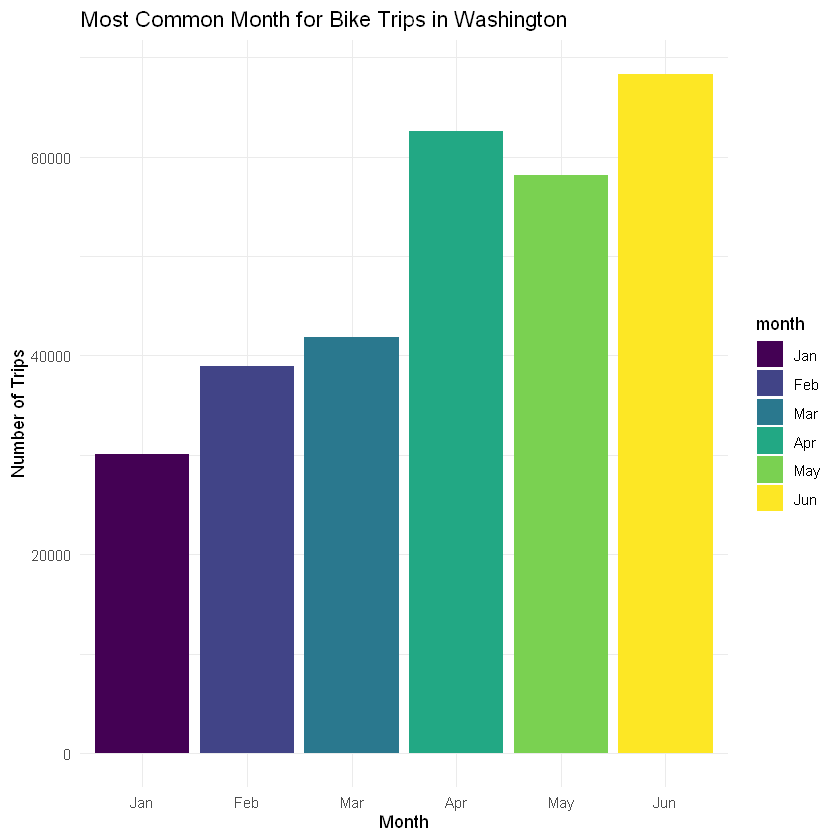


Most common hour of the day in Washington:
# A tibble: 1 × 2
   hour     n
  <int> <int>
1     8 33019


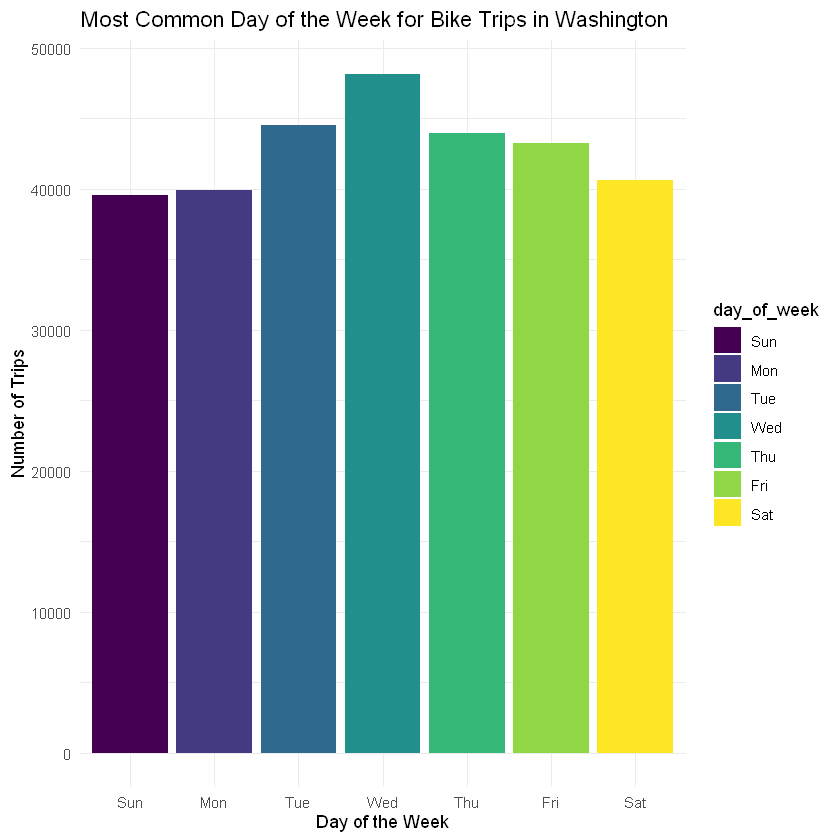

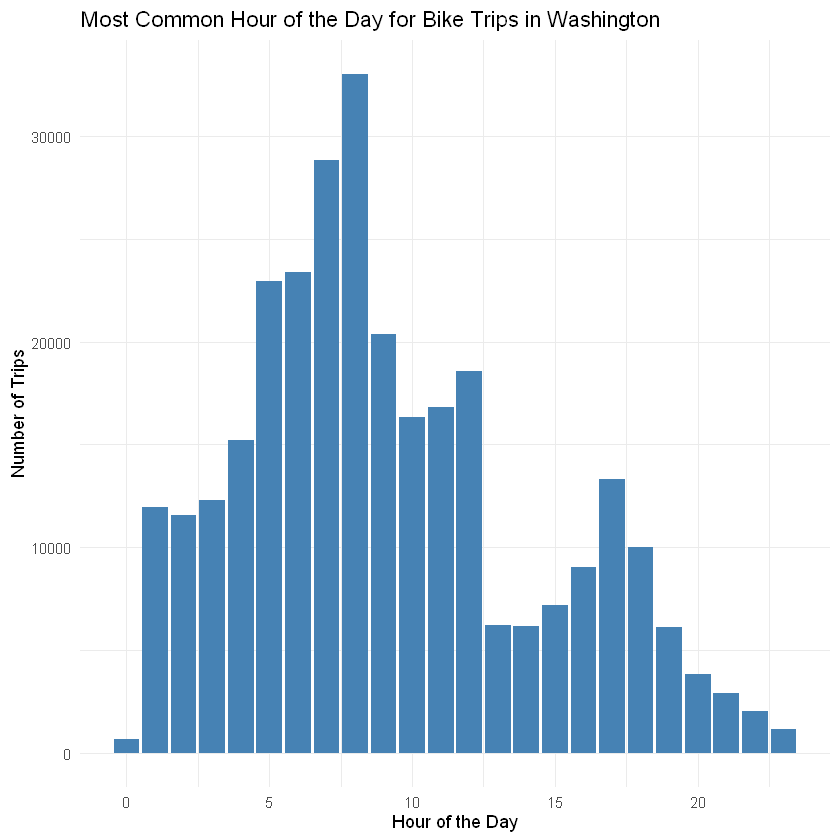

In [20]:
# Load necessary libraries
library(dplyr)
library(lubridate)
library(ggplot2)

# Ensure the column name is referenced correctly and extract time components
wash <- wash %>%
  mutate(
    month = month(`Start Time`, label = TRUE),       # Extracting month
    day_of_week = wday(`Start Time`, label = TRUE),  # Extracting day of the week
    hour = hour(`Start Time`)                        # Extracting hour
  )

# 1. Most common month
most_common_month <- wash %>%
  count(month) %>%
  arrange(desc(n))

cat("Most common month in Washington:\n")
print(most_common_month[1, ])

# Visualization for most common month
ggplot(most_common_month, aes(x = month, y = n, fill = month)) +
  geom_bar(stat = "identity") +
  labs(title = "Most Common Month for Bike Trips in Washington", x = "Month", y = "Number of Trips") +
  theme_minimal()

# 2. Most common day of the week
most_common_day <- wash %>%
  count(day_of_week) %>%
  arrange(desc(n))

cat("\nMost common day of the week in Washington:\n")
print(most_common_day[1, ])

# Visualization for most common day of the week
ggplot(most_common_day, aes(x = day_of_week, y = n, fill = day_of_week)) +
  geom_bar(stat = "identity") +
  labs(title = "Most Common Day of the Week for Bike Trips in Washington", x = "Day of the Week", y = "Number of Trips") +
  theme_minimal()

# 3. Most common hour of the day
most_common_hour <- wash %>%
  count(hour) %>%
  arrange(desc(n))

cat("\nMost common hour of the day in Washington:\n")
print(most_common_hour[1, ])

# Visualization for most common hour of the day
ggplot(most_common_hour, aes(x = hour, y = n)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "Most Common Hour of the Day for Bike Trips in Washington", x = "Hour of the Day", y = "Number of Trips") +
  theme_minimal()


**We Can See that June had the highest number of bike trips in Washington, with a total of 68,339 trips** <br>
**We Can see that Wednesday was the most popular day for bike trips in Washington, with a total of 48,156 trips** <br>
**We Can see that 8 AM was the busiest hour for bike trips in Washington, with a total of 33,019 trips**

### Q1-3 Popular times of travel (i.e., occurs most often in the start time) <br>
**What is the most common month for Chicago?** <br>
**What is the most common day of week for Chicago?.** <br>
**What is the most common hour of day for Chicago?.**

Most common month in Chicago:
# A tibble: 1 × 2
  month     n
  <ord> <int>
1 Jun   98081

Most common day of the week in Chicago:
# A tibble: 1 × 2
  day_of_week     n
  <ord>       <int>
1 Tue         45912


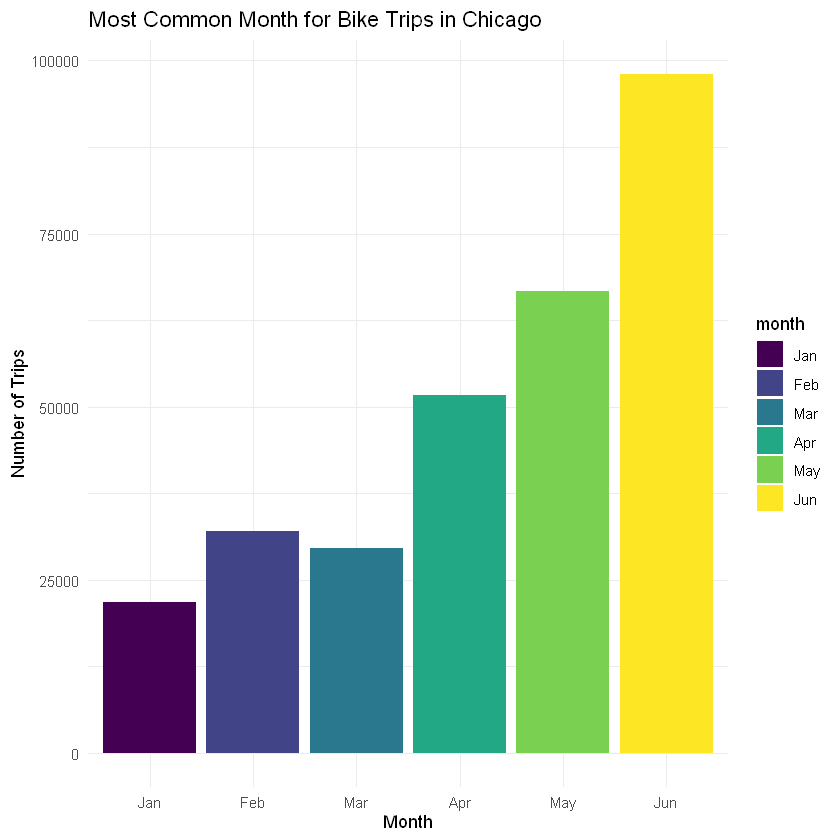


Most common hour of the day in Chicago:
# A tibble: 1 × 2
   hour     n
  <int> <int>
1    17 35992


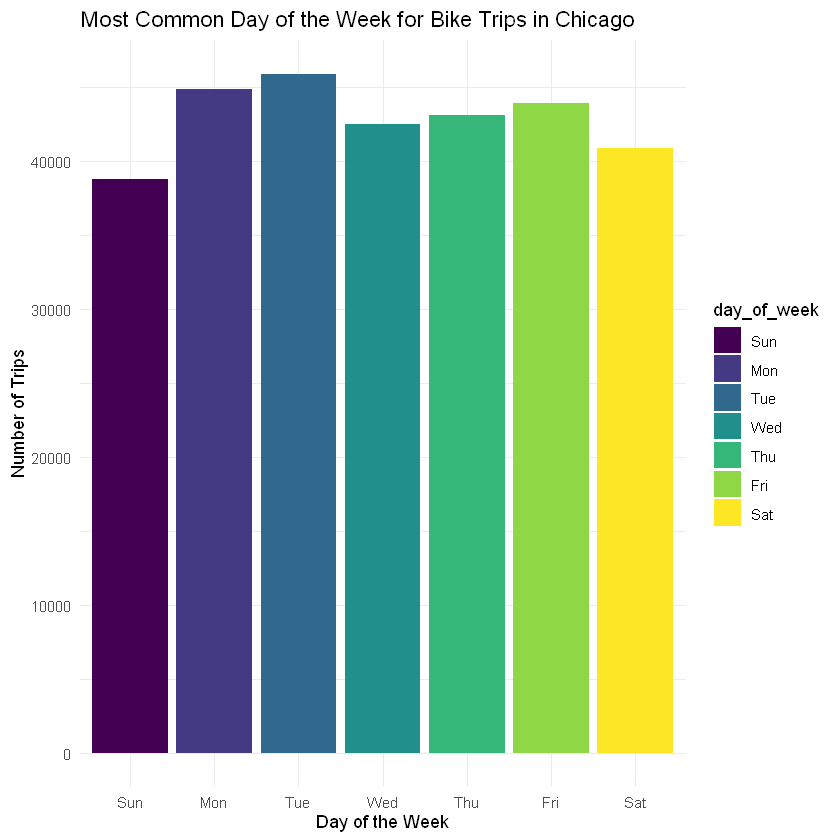

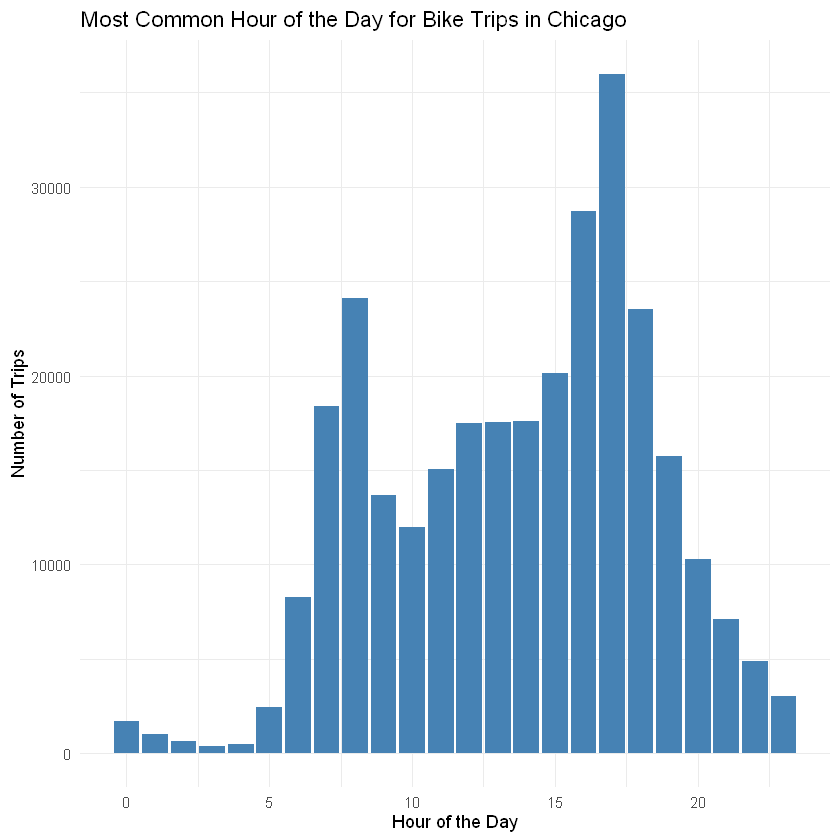

In [21]:
# Load necessary libraries
library(dplyr)
library(lubridate)
library(ggplot2)

# Ensure the column name is referenced correctly and extract time components
chi <- chi %>%
  mutate(
    month = month(`Start Time`, label = TRUE),       # Extracting month
    day_of_week = wday(`Start Time`, label = TRUE),  # Extracting day of the week
    hour = hour(`Start Time`)                        # Extracting hour
  )

# 1. Most common month
most_common_month <- chi %>%
  count(month) %>%
  arrange(desc(n))

cat("Most common month in Chicago:\n")
print(most_common_month[1, ])

# Visualization for most common month
ggplot(most_common_month, aes(x = month, y = n, fill = month)) +
  geom_bar(stat = "identity") +
  labs(title = "Most Common Month for Bike Trips in Chicago", x = "Month", y = "Number of Trips") +
  theme_minimal()

# 2. Most common day of the week
most_common_day <- chi %>%
  count(day_of_week) %>%
  arrange(desc(n))

cat("\nMost common day of the week in Chicago:\n")
print(most_common_day[1, ])

# Visualization for most common day of the week
ggplot(most_common_day, aes(x = day_of_week, y = n, fill = day_of_week)) +
  geom_bar(stat = "identity") +
  labs(title = "Most Common Day of the Week for Bike Trips in Chicago", x = "Day of the Week", y = "Number of Trips") +
  theme_minimal()

# 3. Most common hour of the day
most_common_hour <- chi %>%
  count(hour) %>%
  arrange(desc(n))

cat("\nMost common hour of the day in Chicago:\n")
print(most_common_hour[1, ])

# Visualization for most common hour of the day
ggplot(most_common_hour, aes(x = hour, y = n)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "Most Common Hour of the Day for Bike Trips in Chicago", x = "Hour of the Day", y = "Number of Trips") +
  theme_minimal()


**We Can See that June had the highest number of bike trips in Chicago, with a total of 98,081 trips** <br>
**We Can see that Tuesday was the most popular day for bike trips in Chicago, with a total of 45,912 trips** <br>
**We Can see that 5 PM was the busiest hour for bike trips in Chicago, with a total of 35,992 trips**

### Question 2-1
#2 Popular stations and trip <br>
**What is the most common start station for NewYork?** <br>
**What is the most common end station for NewYork?** <br>
**What is the most common trip from start to end for NewYork (i.e., most frequent combination of start station and end station)?**


Most common start station in New York:
# A tibble: 1 × 2
  `Start Station`           n
  <chr>                 <int>
1 Pershing Square North  3069

Most common end station in New York:
# A tibble: 1 × 2
  `End Station`             n
  <chr>                 <int>
1 Pershing Square North  3077


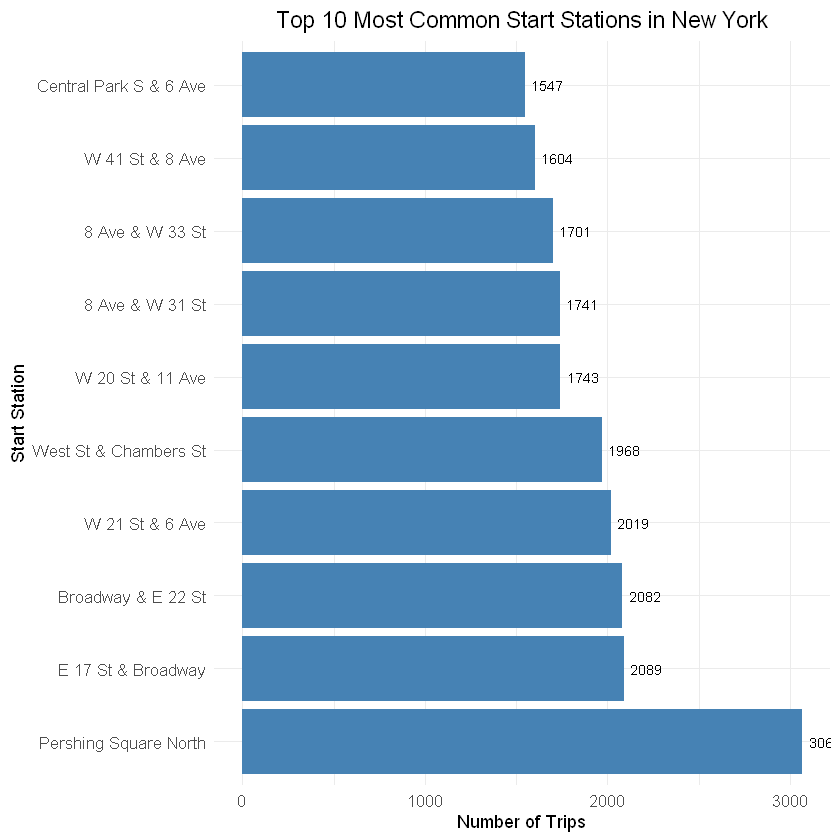


Most common trip in New York:
# A tibble: 1 × 2
  trip                                            n
  <chr>                                       <int>
1 E 7 St & Avenue A to Cooper Square & E 7 St   168


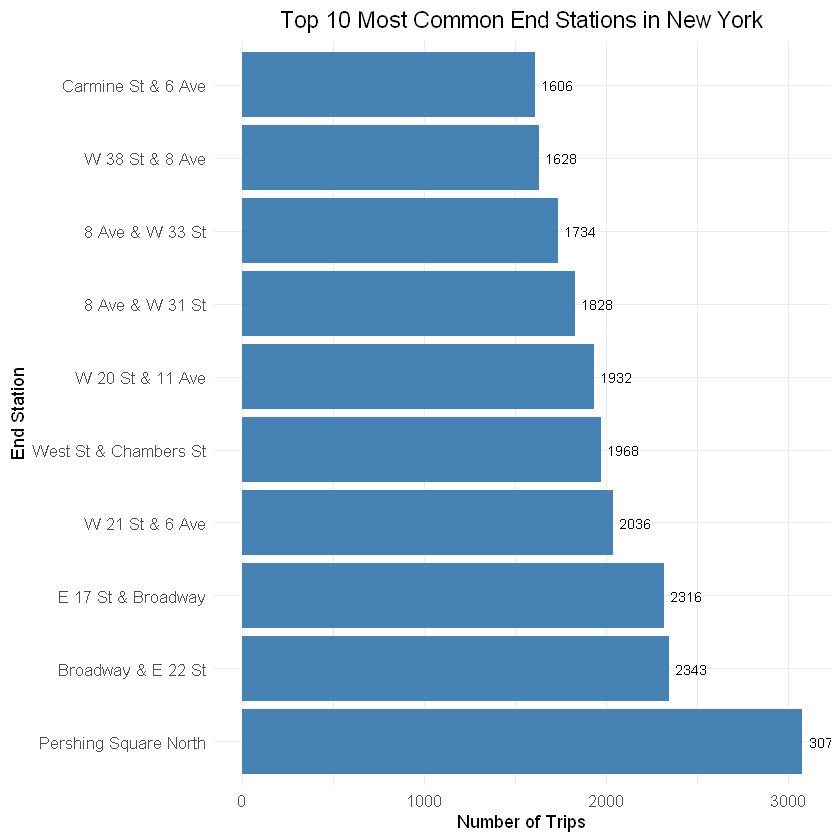

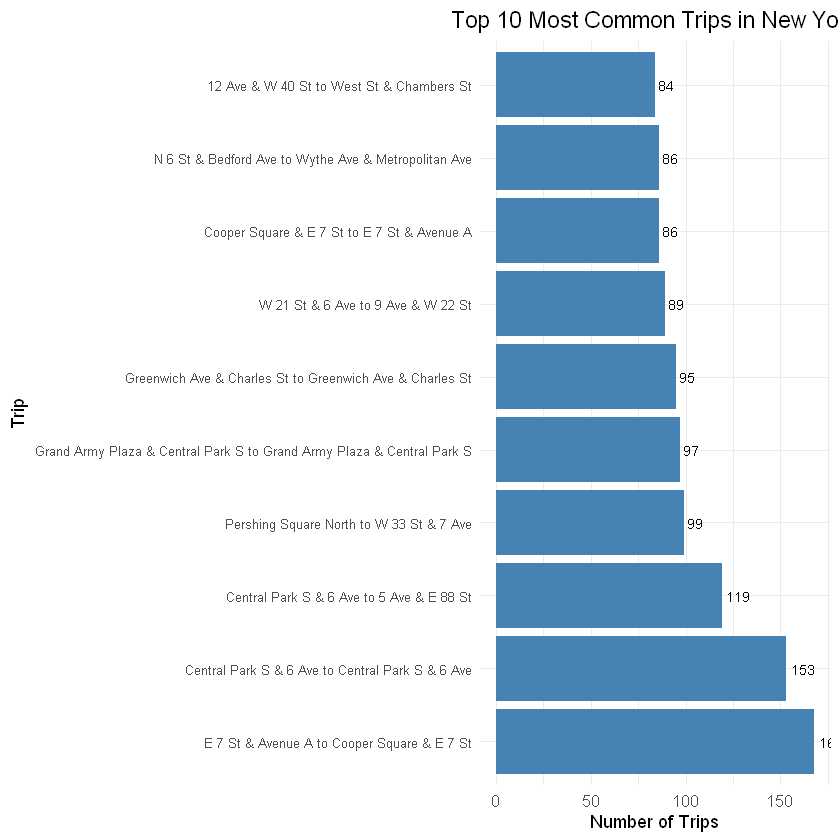

In [31]:

# 1. Most common start station
most_common_start_station <- ny %>%
  count(`Start Station`) %>%
  arrange(desc(n))

cat("Most common start station in New York:\n")
print(most_common_start_station[1, ])

# Visualization for most common start stations (Top 10)
ggplot(most_common_start_station[1:10, ], aes(x = reorder(`Start Station`, -n), y = n)) +
  geom_bar(stat = "identity", fill = "steelblue") +  # Use a single color for simplicity
  coord_flip() +
  geom_text(aes(label = n), hjust = -0.2, size = 3) +  # Add data labels to the bars
  labs(
    title = "Top 10 Most Common Start Stations in New York",
    x = "Start Station",
    y = "Number of Trips"
  ) +
  theme_minimal() +
  theme(
    axis.text.y = element_text(size = 10),  # Adjust text size for station names
    axis.text.x = element_text(size = 10),  # Adjust text size for x-axis labels
    plot.title = element_text(hjust = 0.5, size = 14),  # Center and enlarge the title
    legend.position = "none"  # Remove the legend
  )

# 2. Most common end station
most_common_end_station <- ny %>%
  count(`End Station`) %>%
  arrange(desc(n))

cat("\nMost common end station in New York:\n")
print(most_common_end_station[1, ])

# Visualization for most common end stations (Top 10)
ggplot(most_common_end_station[1:10, ], aes(x = reorder(`End Station`, -n), y = n)) +
  geom_bar(stat = "identity", fill = "steelblue") +  # Use a single color for simplicity
  coord_flip() +
  geom_text(aes(label = n), hjust = -0.2, size = 3) +  # Add data labels to the bars
  labs(
    title = "Top 10 Most Common End Stations in New York",
    x = "End Station",
    y = "Number of Trips"
  ) +
  theme_minimal() +
  theme(
    axis.text.y = element_text(size = 10),  # Adjust text size for station names
    axis.text.x = element_text(size = 10),  # Adjust text size for x-axis labels
    plot.title = element_text(hjust = 0.5, size = 14),  # Center and enlarge the title
    legend.position = "none"  # Remove the legend
  )

# 3. Most common trip (start to end)
most_common_trip <- ny %>%
  mutate(trip = paste(`Start Station`, "to", `End Station`)) %>%
  count(trip) %>%
  arrange(desc(n))

cat("\nMost common trip in New York:\n")
print(most_common_trip[1, ])

# Visualization for most common trips (Top 10)
ggplot(most_common_trip[1:10, ], aes(x = reorder(trip, -n), y = n)) +
  geom_bar(stat = "identity", fill = "steelblue") +  # Use a single color for simplicity
  coord_flip() +
  geom_text(aes(label = n), hjust = -0.2, size = 3) +  # Add data labels to the bars
  labs(
    title = "Top 10 Most Common Trips in New York",
    x = "Trip",
    y = "Number of Trips"
  ) +
  theme_minimal() +
  theme(
    axis.text.y = element_text(size = 8),  # Adjust text size for trip names
    axis.text.x = element_text(size = 10),  # Adjust text size for x-axis labels
    plot.title = element_text(hjust = 0.5, size = 14),  # Center and enlarge the title
    legend.position = "none"  # Remove the legend
  )


**From the Results we can see** <br>
**Start Station:** The most common station where trips started is **Pershing Square North**. <br>
**n:** The number of trips that started at this station is **3,069 trips**. <br>
**This means that Pershing Square North is the most popular starting point for bike trips in New York** <br>
**End Station:** The most common station where trips ended is also **Pershing Square North.** <br>
**n:** The number of trips that ended at this station is **3,077**. <br>
**This indicates that Pershing Square North is not only the most popular starting point but also the most popular destination for bike trips in New York.** <br>
**trip:** The most common trip is from **E 7 St & Avenue A to Cooper Square & E 7 St.** <br>
**n:** The number of trips for this specific route is **168.** <br>
**This means that the trip from E 7 St & Avenue A to Cooper Square & E 7 St is the most frequently traveled route in New York.**

### Question 2-2
#2 Popular stations and trip <br>
**What is the most common start station for Washington?** <br>
**What is the most common end station for Washington?** <br>
**What is the most common trip from start to end for Washington (i.e., most frequent combination of start station and end station)?**


Most common start station in Washington:
# A tibble: 1 × 2
  `Start Station`                     n
  <chr>                           <int>
1 Columbus Circle / Union Station  5656

Most common end station in Washington:
# A tibble: 1 × 2
  `End Station`                       n
  <chr>                           <int>
1 Columbus Circle / Union Station  6048


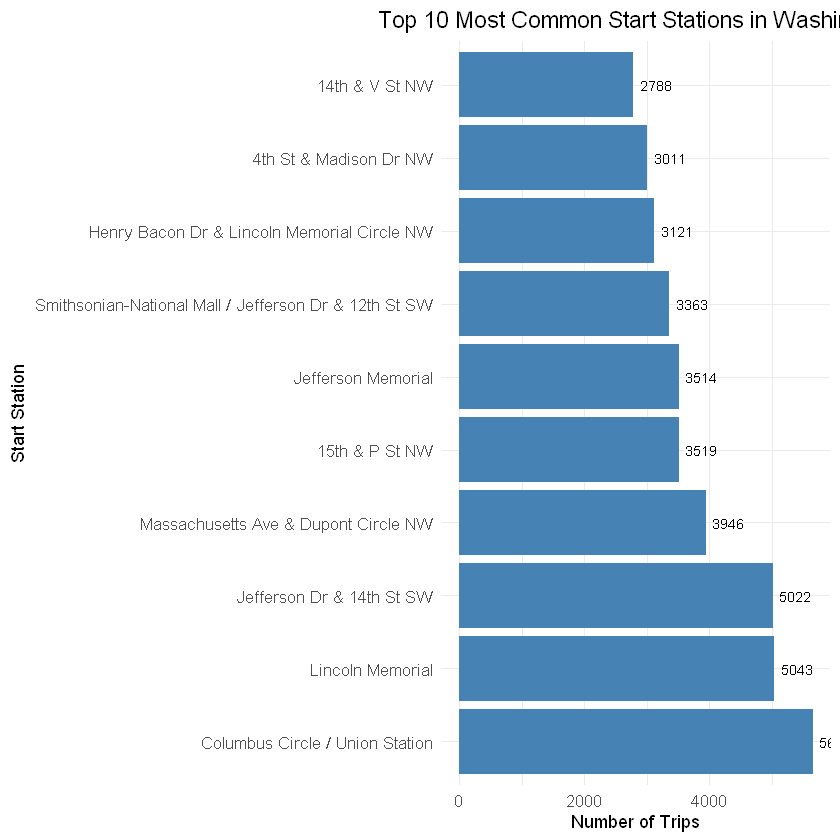


Most common trip in Washington:
# A tibble: 1 × 2
  trip                                                       n
  <chr>                                                  <int>
1 Jefferson Dr & 14th St SW to Jefferson Dr & 14th St SW   673


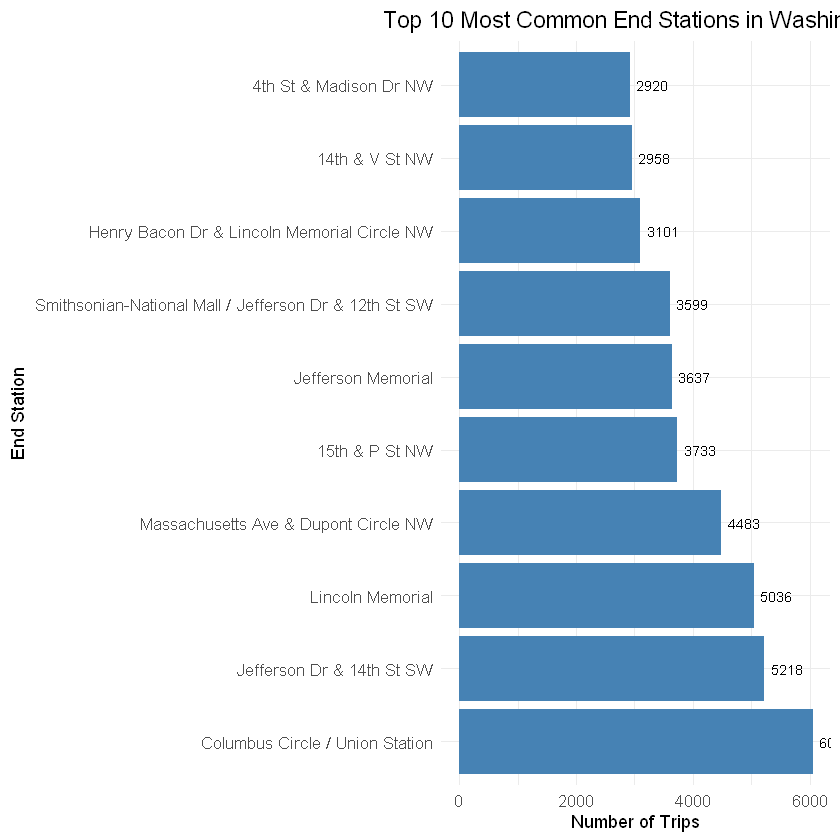

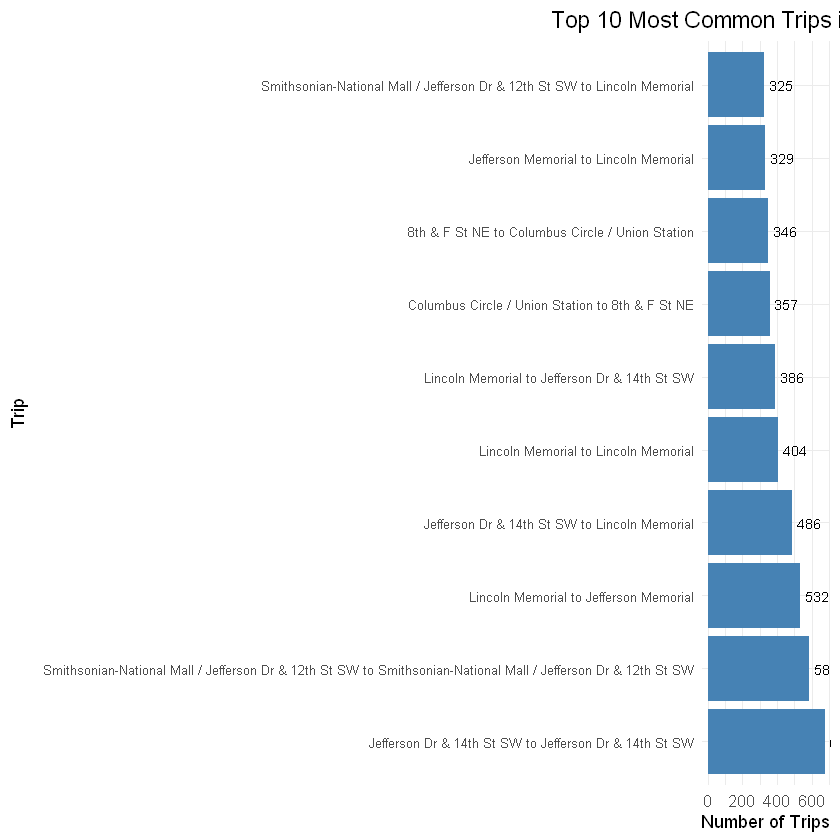

In [30]:


# 1. Most common start station
most_common_start_station <- wash %>%
  count(`Start Station`) %>%
  arrange(desc(n))

cat("Most common start station in Washington:\n")
print(most_common_start_station[1, ])

# Visualization for most common start stations (Top 10)
ggplot(most_common_start_station[1:10, ], aes(x = reorder(`Start Station`, -n), y = n)) +
  geom_bar(stat = "identity", fill = "steelblue") +  # Use a single color for simplicity
  coord_flip() +
  geom_text(aes(label = n), hjust = -0.2, size = 3) +  # Add data labels to the bars
  labs(
    title = "Top 10 Most Common Start Stations in Washington",
    x = "Start Station",
    y = "Number of Trips"
  ) +
  theme_minimal() +
  theme(
    axis.text.y = element_text(size = 10),  # Adjust text size for station names
    axis.text.x = element_text(size = 10),  # Adjust text size for x-axis labels
    plot.title = element_text(hjust = 0.5, size = 14),  # Center and enlarge the title
    legend.position = "none"  # Remove the legend
  )

# 2. Most common end station
most_common_end_station <- wash %>%
  count(`End Station`) %>%
  arrange(desc(n))

cat("\nMost common end station in Washington:\n")
print(most_common_end_station[1, ])

# Visualization for most common end stations (Top 10)
ggplot(most_common_end_station[1:10, ], aes(x = reorder(`End Station`, -n), y = n)) +
  geom_bar(stat = "identity", fill = "steelblue") +  # Use a single color for simplicity
  coord_flip() +
  geom_text(aes(label = n), hjust = -0.2, size = 3) +  # Add data labels to the bars
  labs(
    title = "Top 10 Most Common End Stations in Washington",
    x = "End Station",
    y = "Number of Trips"
  ) +
  theme_minimal() +
  theme(
    axis.text.y = element_text(size = 10),  # Adjust text size for station names
    axis.text.x = element_text(size = 10),  # Adjust text size for x-axis labels
    plot.title = element_text(hjust = 0.5, size = 14),  # Center and enlarge the title
    legend.position = "none"  # Remove the legend
  )

# 3. Most common trip (start to end)
most_common_trip <- wash %>%
  mutate(trip = paste(`Start Station`, "to", `End Station`)) %>%
  count(trip) %>%
  arrange(desc(n))

cat("\nMost common trip in Washington:\n")
print(most_common_trip[1, ])

# Visualization for most common trips (Top 10)
ggplot(most_common_trip[1:10, ], aes(x = reorder(trip, -n), y = n)) +
  geom_bar(stat = "identity", fill = "steelblue") +  # Use a single color for simplicity
  coord_flip() +
  geom_text(aes(label = n), hjust = -0.2, size = 3) +  # Add data labels to the bars
  labs(
    title = "Top 10 Most Common Trips in Washington",
    x = "Trip",
    y = "Number of Trips"
  ) +
  theme_minimal() +
  theme(
    axis.text.y = element_text(size = 8),  # Adjust text size for trip names
    axis.text.x = element_text(size = 10),  # Adjust text size for x-axis labels
    plot.title = element_text(hjust = 0.5, size = 14),  # Center and enlarge the title
    legend.position = "none"  # Remove the legend
  )


**From the Results we can see** <br>
**Start Station:** The most common station where trips started is **Columbus Circle / Union Station.** <br>
**n:** The number of trips that started at this station is **5,656.** <br>
**This indicates that Columbus Circle / Union Station is a major hub for bike-sharing in Washington** <br>
**End Station:** The most common station where trips ended is also **Columbus Circle / Union Station.** <br>
**n:** The number of trips that ended at this station is **6,048.** <br>
**This suggests that Columbus Circle / Union Station is not only a popular starting point but also a frequent destination for bike trips in Washington** <br>
**trip:** The most common trip is **from Jefferson Dr & 14th St SW to Jefferson Dr & 14th St SW.** <br>
**n:** The number of trips for this specific route is **673.**
**This indicates that the most frequent trip in Washington is a round trip (starting and ending at the same station)**

### Question 2-3
#2 Popular stations and trip <br>
**What is the most common start station for Chicago?** <br>
**What is the most common end station for Chicago?** <br>
**What is the most common trip from start to end for Chicago (i.e., most frequent combination of start station and end station)?**


Most common start station in Chicago:
# A tibble: 1 × 2
  `Start Station`             n
  <chr>                   <int>
1 Streeter Dr & Grand Ave  6911

Most common end station in Chicago:
# A tibble: 1 × 2
  `End Station`               n
  <chr>                   <int>
1 Streeter Dr & Grand Ave  7512


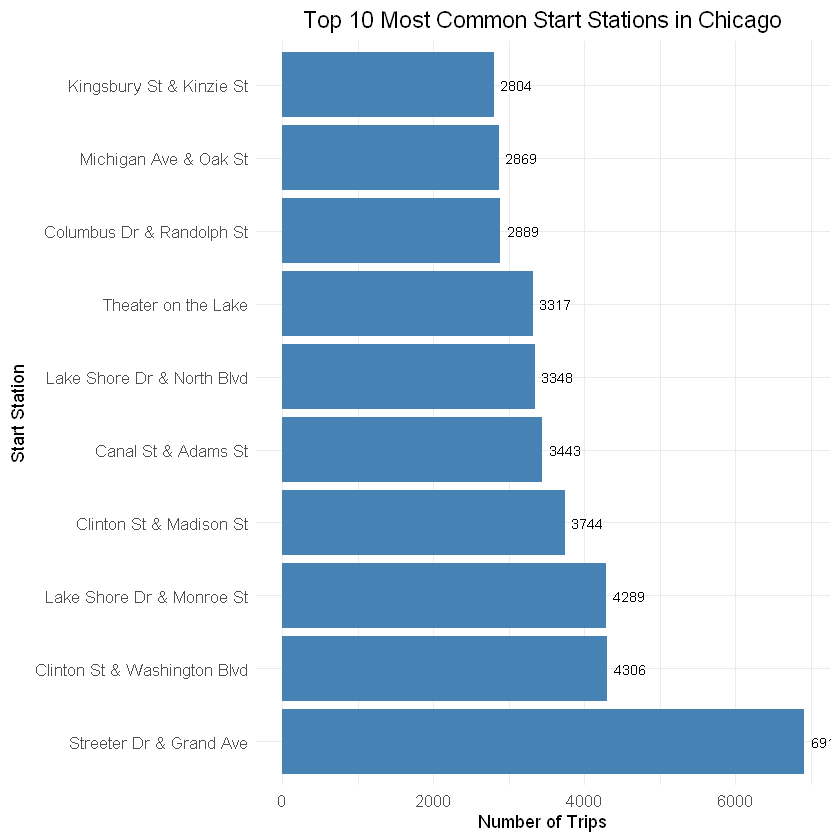


Most common trip in Chicago:
# A tibble: 1 × 2
  trip                                                     n
  <chr>                                                <int>
1 Lake Shore Dr & Monroe St to Streeter Dr & Grand Ave   854


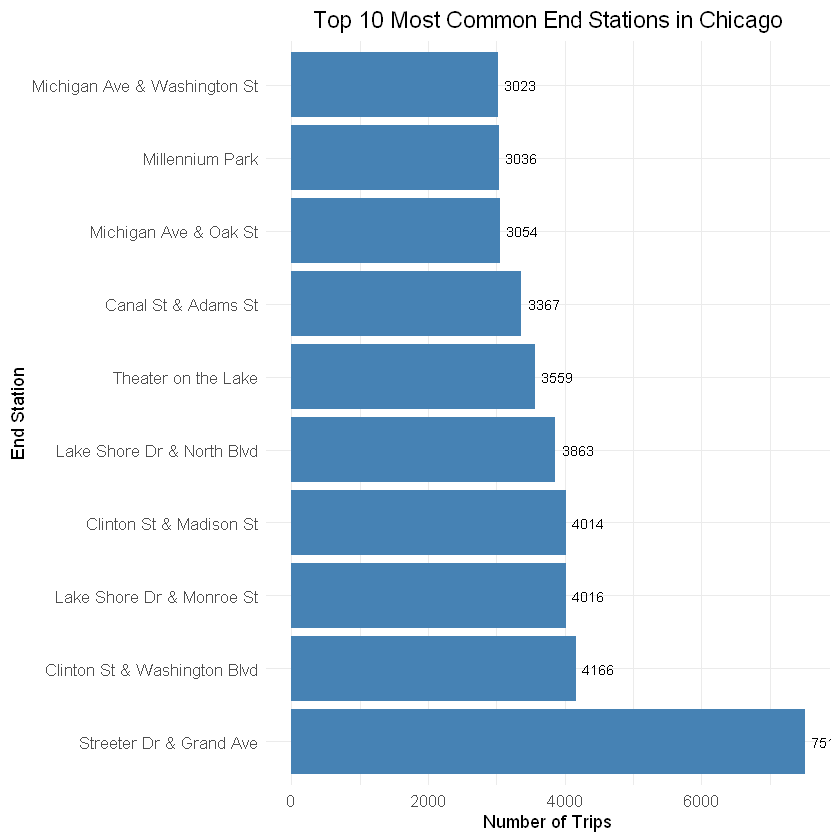

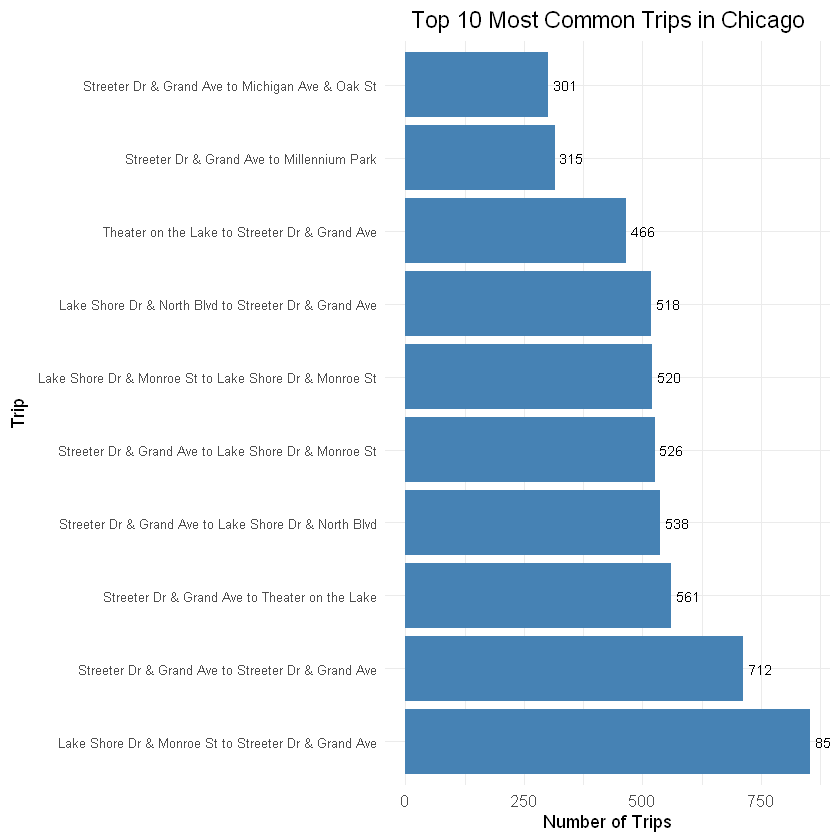

In [29]:

# Analyzing the Chicago dataset (wash)

# 1. Most common start station
most_common_start_station <- chi %>%
  count(`Start Station`) %>%
  arrange(desc(n))

cat("Most common start station in Chicago:\n")
print(most_common_start_station[1, ])

# Visualization for most common start stations (Top 10)
ggplot(most_common_start_station[1:10, ], aes(x = reorder(`Start Station`, -n), y = n)) +
  geom_bar(stat = "identity", fill = "steelblue") +  # Use a single color for simplicity
  coord_flip() +
  geom_text(aes(label = n), hjust = -0.2, size = 3) +  # Add data labels to the bars
  labs(
    title = "Top 10 Most Common Start Stations in Chicago",
    x = "Start Station",
    y = "Number of Trips"
  ) +
  theme_minimal() +
  theme(
    axis.text.y = element_text(size = 10),  # Adjust text size for station names
    axis.text.x = element_text(size = 10),  # Adjust text size for x-axis labels
    plot.title = element_text(hjust = 0.5, size = 14),  # Center and enlarge the title
    legend.position = "none"  # Remove the legend
  )

# 2. Most common end station
most_common_end_station <- chi %>%
  count(`End Station`) %>%
  arrange(desc(n))

cat("\nMost common end station in Chicago:\n")
print(most_common_end_station[1, ])

# Visualization for most common end stations (Top 10)
ggplot(most_common_end_station[1:10, ], aes(x = reorder(`End Station`, -n), y = n)) +
  geom_bar(stat = "identity", fill = "steelblue") +  # Use a single color for simplicity
  coord_flip() +
  geom_text(aes(label = n), hjust = -0.2, size = 3) +  # Add data labels to the bars
  labs(
    title = "Top 10 Most Common End Stations in Chicago",
    x = "End Station",
    y = "Number of Trips"
  ) +
  theme_minimal() +
  theme(
    axis.text.y = element_text(size = 10),  # Adjust text size for station names
    axis.text.x = element_text(size = 10),  # Adjust text size for x-axis labels
    plot.title = element_text(hjust = 0.5, size = 14),  # Center and enlarge the title
    legend.position = "none"  # Remove the legend
  )

# 3. Most common trip (start to end)
most_common_trip <- chi %>%
  mutate(trip = paste(`Start Station`, "to", `End Station`)) %>%
  count(trip) %>%
  arrange(desc(n))

cat("\nMost common trip in Chicago:\n")
print(most_common_trip[1, ])

# Visualization for most common trips (Top 10)
ggplot(most_common_trip[1:10, ], aes(x = reorder(trip, -n), y = n)) +
  geom_bar(stat = "identity", fill = "steelblue") +  # Use a single color for simplicity
  coord_flip() +
  geom_text(aes(label = n), hjust = -0.2, size = 3) +  # Add data labels to the bars
  labs(
    title = "Top 10 Most Common Trips in Chicago",
    x = "Trip",
    y = "Number of Trips"
  ) +
  theme_minimal() +
  theme(
    axis.text.y = element_text(size = 8),  # Adjust text size for trip names
    axis.text.x = element_text(size = 10),  # Adjust text size for x-axis labels
    plot.title = element_text(hjust = 0.5, size = 14),  # Center and enlarge the title
    legend.position = "none"  # Remove the legend
  )


**From the Results we can see** <br>
**Start Station:** The most common station where trips started is **Streeter Dr & Grand Ave.** <br>
**n:** The number of trips that started at this station is **6,911.** <br>
**This indicates that Streeter Dr & Grand Ave is a major hub for bike-sharing in Chicago** <br>
**End Station:** The most common station where trips ended is also **Streeter Dr & Grand Ave.** <br>
**n:** The number of trips that ended at this station is **7,512.** <br>
**This suggests that Streeter Dr & Grand Ave is not only a popular starting point but also a frequent destination for bike trips in Chicago.** <br>
**trip:** The most common trip is **Lake Shore Dr & Monroe St to Streeter Dr & Grand Ave.** <br>
**n:** The number of trips for this specific route is **854.**
**This indicates that the trip from Lake Shore Dr & Monroe St to Streeter Dr & Grand Ave is the most frequently traveled route in Chicago**

### Question 3
Trip duration <br>
**•What is the total travel time for users in different cities?** <br>
**•What is the average travel time for users in different cities?**


        City Total_Travel_Time_Hours Average_Travel_Time_Minutes
1   New York                74973.68                    14.99474
2    Chicago                78019.94                    15.60399
3 Washington               103106.66                    20.62133


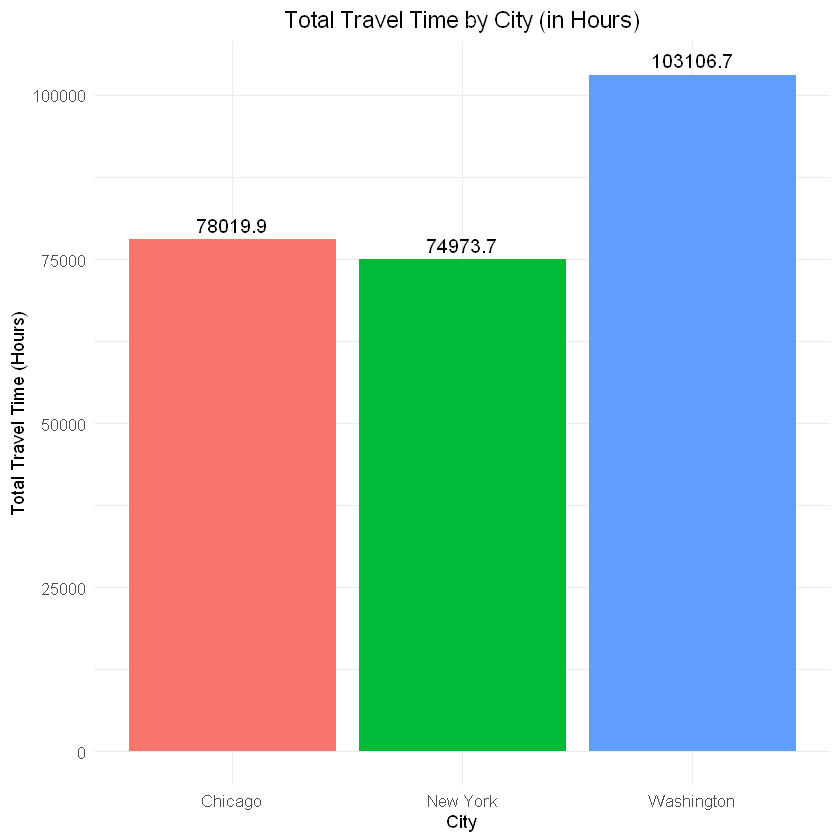

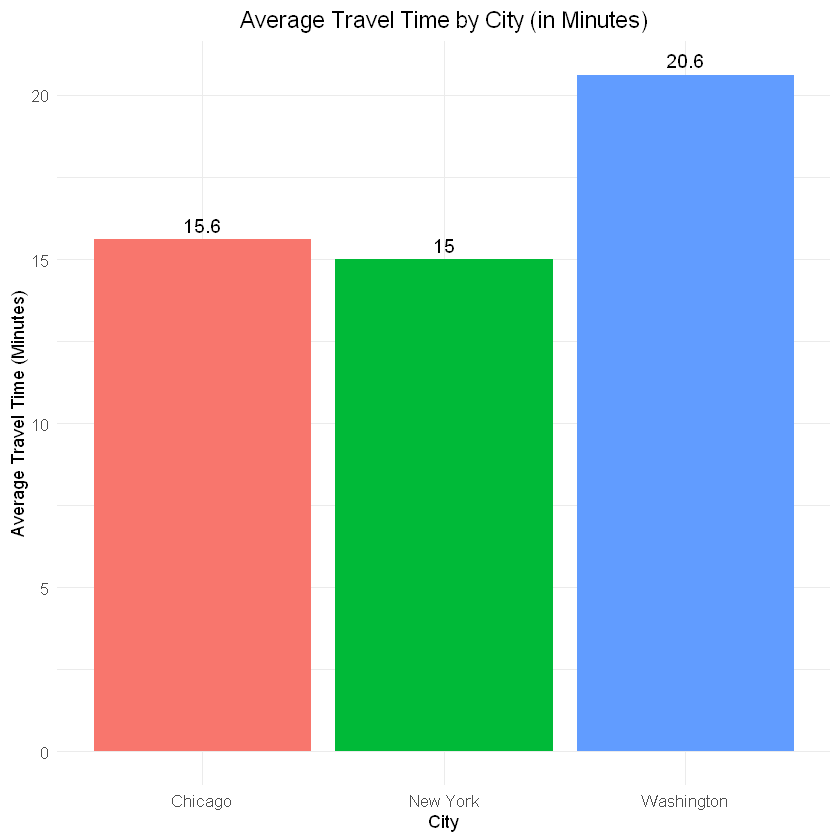

In [32]:
# Calculate total and average travel time for each city
travel_time_data <- data.frame(
  City = c("New York", "Chicago", "Washington"),
  Total_Travel_Time_Hours = c(
    sum(ny$`Trip Duration`, na.rm = TRUE) / 3600,  # Convert seconds to hours
    sum(chi$`Trip Duration`, na.rm = TRUE) / 3600,
    sum(wash$`Trip Duration`, na.rm = TRUE) / 3600
  ),
  Average_Travel_Time_Minutes = c(
    mean(ny$`Trip Duration`, na.rm = TRUE) / 60,  # Convert seconds to minutes
    mean(chi$`Trip Duration`, na.rm = TRUE) / 60,
    mean(wash$`Trip Duration`, na.rm = TRUE) / 60
  )
)

# Print the travel time data
print(travel_time_data)

# Visualization for total travel time
ggplot(travel_time_data, aes(x = City, y = Total_Travel_Time_Hours, fill = City)) +
  geom_bar(stat = "identity", show.legend = FALSE) +  # Remove legend
  geom_text(aes(label = round(Total_Travel_Time_Hours, 1)), vjust = -0.5, size = 4) +  # Add data labels
  labs(
    title = "Total Travel Time by City (in Hours)",
    x = "City",
    y = "Total Travel Time (Hours)"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(size = 10),  # Adjust text size for x-axis labels
    axis.text.y = element_text(size = 10),  # Adjust text size for y-axis labels
    plot.title = element_text(hjust = 0.5, size = 14)  # Center and enlarge the title
  )

# Visualization for average travel time
ggplot(travel_time_data, aes(x = City, y = Average_Travel_Time_Minutes, fill = City)) +
  geom_bar(stat = "identity", show.legend = FALSE) +  # Remove legend
  geom_text(aes(label = round(Average_Travel_Time_Minutes, 1)), vjust = -0.5, size = 4) +  # Add data labels
  labs(
    title = "Average Travel Time by City (in Minutes)",
    x = "City",
    y = "Average Travel Time (Minutes)"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(size = 10),  # Adjust text size for x-axis labels
    axis.text.y = element_text(size = 10),  # Adjust text size for y-axis labels
    plot.title = element_text(hjust = 0.5, size = 14)  # Center and enlarge the title
  )


**NewYork** <br>
**Total Travel Time:** 269,905,248 seconds , This means users in New York spent approximately 74,974 hours on bike trips <br>
**Average Travel Time:** 900 seconds,This means the average bike trip in New York lasts 15 minutes <br>
**Chicago** <br>
**Total Travel Time:** 280,871,787 seconds. , This means users in Chicago spent approximately 78,020 hours on bike trips <br>
**Average Travel Time:** 936 seconds,This means the average bike trip in Chicago lasts approximately 15.6 minutes <br>
**Washington** <br>
**Total Travel Time:** 371,183,985 seconds. , This means users in Washington spent approximately 103,107 hours on bike trips <br>
**Average Travel Time:** 1237 seconds,This means the average bike trip in Washington lasts approximately 20.6 minutes <br>

### Question 4-1
User Information <br>
**•	What are the counts of each user type?** <br>
**•	What are the counts of each gender (only available for NYC and Chicago)?** <br>
**•	What are the earliest, most recent, most common year of birth (only available for NYC and Chicago)?** <br>



In [34]:
# 1. Counts of each user type
# New York
ny_user_type_counts <- ny %>%
  count(`User Type`)

cat("Counts of each user type in New York:\n")
print(ny_user_type_counts)

# Chicago
chi_user_type_counts <- chi %>%
  count(`User Type`)

cat("\nCounts of each user type in Chicago:\n")
print(chi_user_type_counts)

# Washington
wash_user_type_counts <- wash %>%
  count(`User Type`)

cat("\nCounts of each user type in Washington:\n")
print(wash_user_type_counts)

# 2. Counts of each gender (only for NYC and Chicago)
# New York
ny_gender_counts <- ny %>%
  count(Gender)

cat("\nCounts of each gender in New York:\n")
print(ny_gender_counts)

# Chicago
chi_gender_counts <- chi %>%
  count(Gender)

cat("\nCounts of each gender in Chicago:\n")
print(chi_gender_counts)

# 3. Birth year statistics (only for NYC and Chicago)
# New York
ny_birth_year_stats <- ny %>%
  summarise(
    earliest_birth_year = min(`Birth Year`, na.rm = TRUE),
    most_recent_birth_year = max(`Birth Year`, na.rm = TRUE),
    most_common_birth_year = as.numeric(names(which.max(table(`Birth Year`))))
  )

cat("\nBirth year statistics for New York:\n")
print(ny_birth_year_stats)

# Chicago
chi_birth_year_stats <- chi %>%
  summarise(
    earliest_birth_year = min(`Birth Year`, na.rm = TRUE),
    most_recent_birth_year = max(`Birth Year`, na.rm = TRUE),
    most_common_birth_year = as.numeric(names(which.max(table(`Birth Year`))))
  )

cat("\nBirth year statistics for Chicago:\n")
print(chi_birth_year_stats)


Counts of each user type in New York:
# A tibble: 3 × 2
  `User Type`      n
  <chr>        <int>
1 Customer     30159
2 Subscriber  269149
3 NA             692

Counts of each user type in Chicago:
# A tibble: 3 × 2
  `User Type`      n
  <chr>        <int>
1 Customer     61110
2 Dependent        1
3 Subscriber  238889

Counts of each user type in Washington:
# A tibble: 2 × 2
  `User Type`      n
  <chr>        <int>
1 Customer     79214
2 Subscriber  220786

Counts of each gender in New York:
# A tibble: 3 × 2
  Gender      n
  <chr>   <int>
1 Female  66783
2 Male   204008
3 NA      29209

Counts of each gender in Chicago:
# A tibble: 3 × 2
  Gender      n
  <chr>   <int>
1 Female  57758
2 Male   181190
3 NA      61052

Birth year statistics for New York:
# A tibble: 1 × 3
  earliest_birth_year most_recent_birth_year most_common_birth_year
                <dbl>                  <dbl>                  <dbl>
1                1885                   2001                   1989

Birth ye

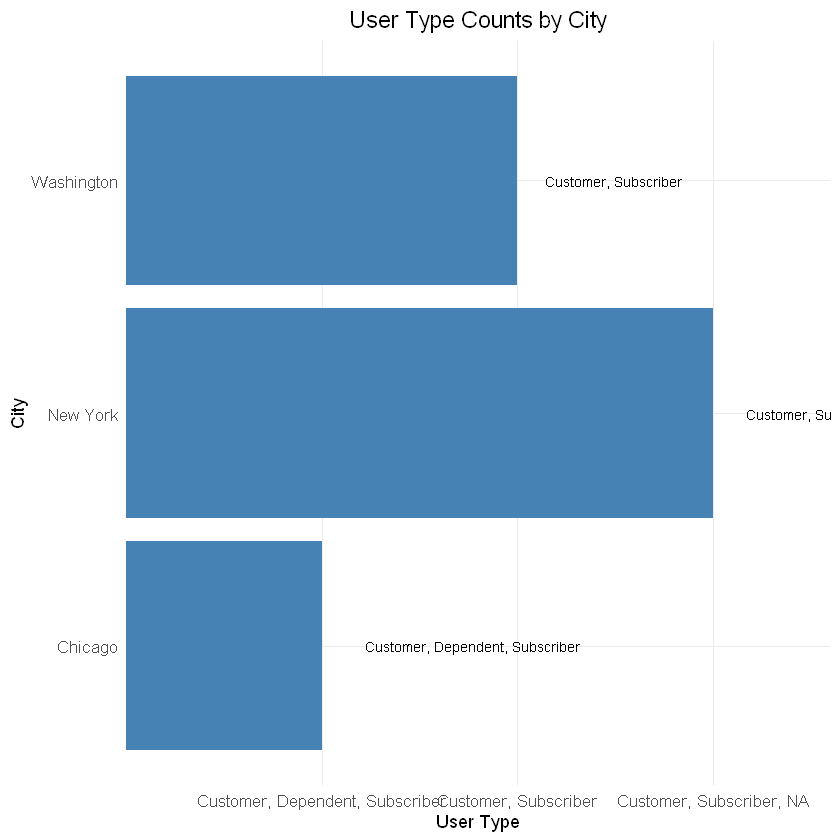

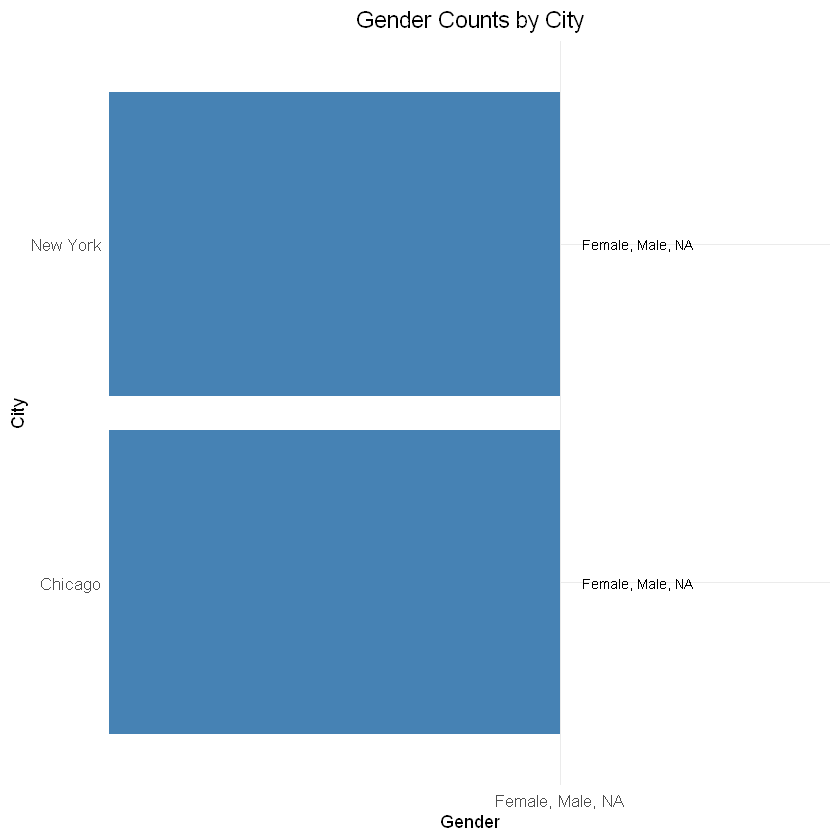

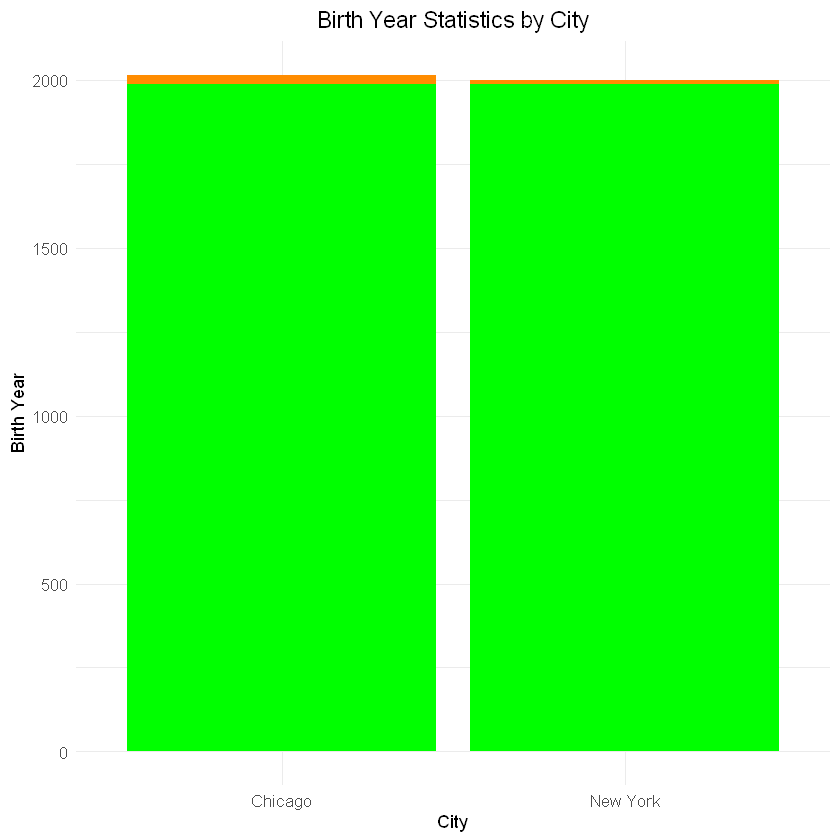

In [33]:

# 1. Counts of each user type
# Combine data for all cities
user_type_data <- data.frame(
  City = c("New York", "Chicago", "Washington"),
  User_Type = c(
    paste(ny_user_type_counts$`User Type`, collapse = ", "),
    paste(chi_user_type_counts$`User Type`, collapse = ", "),
    paste(wash_user_type_counts$`User Type`, collapse = ", ")
  )
)

# Visualization for user type counts
ggplot(user_type_data, aes(x = City, y = User_Type)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  coord_flip() +
  geom_text(aes(label = User_Type), hjust = -0.2, size = 3) +
  labs(
    title = "User Type Counts by City",
    x = "City",
    y = "User Type"
  ) +
  theme_minimal() +
  theme(
    axis.text.y = element_text(size = 10),
    axis.text.x = element_text(size = 10),
    plot.title = element_text(hjust = 0.5, size = 14),
    legend.position = "none"
  )

# 2. Counts of each gender (only for NYC and Chicago)
gender_data <- data.frame(
  City = c("New York", "Chicago"),
  Gender = c(
    paste(ny_gender_counts$Gender, collapse = ", "),
    paste(chi_gender_counts$Gender, collapse = ", ")
  )
)

# Visualization for gender counts
ggplot(gender_data, aes(x = City, y = Gender)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  coord_flip() +
  geom_text(aes(label = Gender), hjust = -0.2, size = 3) +
  labs(
    title = "Gender Counts by City",
    x = "City",
    y = "Gender"
  ) +
  theme_minimal() +
  theme(
    axis.text.y = element_text(size = 10),
    axis.text.x = element_text(size = 10),
    plot.title = element_text(hjust = 0.5, size = 14),
    legend.position = "none"
  )

# 3. Birth year statistics (only for NYC and Chicago)
birth_year_data <- data.frame(
  City = c("New York", "Chicago"),
  Earliest_Birth_Year = c(ny_birth_year_stats$earliest_birth_year, chi_birth_year_stats$earliest_birth_year),
  Most_Recent_Birth_Year = c(ny_birth_year_stats$most_recent_birth_year, chi_birth_year_stats$most_recent_birth_year),
  Most_Common_Birth_Year = c(ny_birth_year_stats$most_common_birth_year, chi_birth_year_stats$most_common_birth_year)
)

# Visualization for birth year statistics
ggplot(birth_year_data, aes(x = City)) +
  geom_bar(aes(y = Earliest_Birth_Year), stat = "identity", fill = "steelblue") +
  geom_bar(aes(y = Most_Recent_Birth_Year), stat = "identity", fill = "darkorange") +
  geom_bar(aes(y = Most_Common_Birth_Year), stat = "identity", fill = "green") +
  labs(
    title = "Birth Year Statistics by City",
    x = "City",
    y = "Birth Year"
  ) +
  theme_minimal() +
  theme(
    axis.text.y = element_text(size = 10),
    axis.text.x = element_text(size = 10),
    plot.title = element_text(hjust = 0.5, size = 14),
    legend.position = "none"
  )


**User Type** <br>
* This means there are 30159 Customers and 269149 Subscribers in New York <br>
* This means there are 61110 Customers and one dependent and 238889 Subscribers in Chicago <br>
* This means there are 79214 Customers and 220786 Subscribers in Washington <br>
**Each Gender** <br>
* There are 66783 Females and 204008 Males and 29208 NA ( Not Applicable) in NewYork <br>
* There are 57758 Females and 181190 Males and 61052 NA ( Not Applicable) in Chicago <br>

**Birth Year Statistics for New York** <br>
**Earliest Birth Year:** 1885 <br>
This indicates that the oldest user in the New York dataset was born in 1885 (I think it should be 1985 and the user entered the date in a hurry). While this is technically possible, <br>
it is likely an outlier or a data entry error, as this would make the user 140 years old in 2025.<br>
**Most Recent Birth Year:** 2001 <br>
This indicates that the youngest user in the New York dataset was born in 2001, making them 24 years old in 2025. This is a reasonable value. <br>
**Most Common Birth Year:** 1989 <br>
This indicates that the majority of users in the New York dataset were born in 1989, <br>
making them 36 years old in 2025. This suggests that the bike-sharing system is most popular among users in their mid-30s.

**Birth Year Statistics for Chicago** <br>
**Earliest Birth Year:** 1899 <br>
This indicates that the oldest user in the Chicago dataset was born in 1899. <br>
Similar to New York, this is likely an outlier or a data entry error, as this would make the user 126 years old in 2025.<br>
**Most Recent Birth Year:** 2016
This indicates that the youngest user in the Chicago dataset was born in 2016, <br>
making them 9 years old in 2025. This is almost certainly a data entry error, <br>
as it is highly unlikely for a 9-year-old to use the bike-sharing system. <br>
**Most Common Birth Year:** 1989 <br>
This indicates that the majority of users in the Chicago dataset were born in 1989, making them 36 years old in 2025, similar to New York.



## Finishing Up

> Congratulations!  You have reached the end of the Explore Bikeshare Data Project. You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2508/view). 


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!